# Predict Survival on Titanic
## By: Anita Maskara

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Logistic Regression Model">Logistic Regression Model</a></li> 
</ul>

<a id='intro'></a>
## Introduction
Titanic: Machine Learning from Disaster dataset is used to predict survival on the Titanic and get familiar with ML basics. The data is available at https://www.kaggle.com/c/titanic/data

**Questions answered:**

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

2.) Where did the passengers come from?

3.) Who was alone and who was with family?

4.) What was the average fare for each class at each port of embarkation?

5.) What factors helped someone survive the sinking?

<a id='wrangling'></a>
## Data Wrangling

**Setup**

In [1238]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame

%matplotlib inline

### Gathering data

In [1239]:
df = pd.read_csv('C:\\Users\\aabha.DESKTOP-HG6KK17\\Desktop\\Anita personal\\Python project notebooks\\4 Titanic survival rate\\train.csv')

### Assessing data

In [1240]:
df.shape

(891, 12)

In [1241]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1242]:
df.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
135,136,0,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C


In [1243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [1244]:
# Converting to correct datatype

df['Sex']=df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

#### Check for duplicate records 

In [1245]:
# Checking for duplicate records
sum(df.duplicated())

0

#### Checking for missing data

In [1246]:
# total missing values for each features
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1247]:
data_na_percent = df.isnull().sum()*100/len(df)

#  We sort the data_na_cent in descending order and convert it into a Dataframe with the column 'Missing %'
missing_data = data_na_percent.sort_values(ascending=False)
missing_data = pd.DataFrame(missing_data, 
                            columns = ["Missing%"])
missing_data

,Missing%
Cabin,77.104377
Age,19.865320
Embarked,0.224467
Fare,0.000000
Ticket,0.000000
Parch,0.000000
SibSp,0.000000
Sex,0.000000
Name,0.000000
Pclass,0.000000


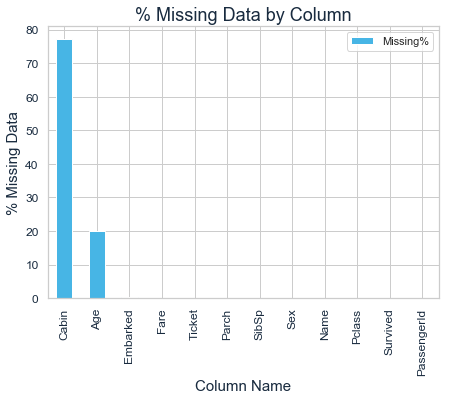

In [1248]:
# plotting missing values percentage
missing_data.plot(kind='bar', color='#47B5E5', figsize=(7,5));  

# Configure the x ticks
plt.xticks(fontsize=12, rotation = 90, color='#192b3f'); 

# Configure the y ticks
plt.yticks(fontsize = 12, color='#192b3f');

# Configure the x label 
plt.xlabel("Column Name", fontsize=15,  color='#192b3f');

# Configure the y label 
plt.ylabel("% Missing Data", fontsize=15, color='#192b3f');

# Configure the title 
plt.title("% Missing Data by Column", fontsize=18, color='#192b3f');

### Cleaning data

**Define**

Locating the two rows where `Embarked` has missing values and replacing missing value with imputed value

**Code**

In [1249]:
# Locating 2 rows where `Embarked` has missing values
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [1250]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

'S' has the highest number of counts in the dataset. So we will replace the missing values with 'S'.

In [1251]:
df['Embarked'].fillna(value = 'S', inplace=True)

**Test**

In [1252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null category
dtypes: category(2), float64(2), int64(5), object(3)
memory usage: 71.6+ KB


Now there are no missing values in Embarked column

**Define**

Delete column `Cabin` as it has 77% missing values

**Code**

In [1253]:
# dropping `Cabin`
df.drop('Cabin', axis=1, inplace=True)

**Test**

In [1254]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

**Define**

Impute the missing values in `Age` column

In [1255]:
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S


**Code**

In [1256]:
# We will not replace missing values with just plain average value. We will impute average age according to Pclass 
# and Sex groups

df.groupby(['Pclass', 'Sex'])['Age'].mean().unstack()

Sex,female,male
Pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589


In [1257]:
df['Age'].fillna(df.groupby(['Pclass','Sex'])['Age'].transform("mean"), inplace=True)

**Test**

In [1258]:
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,26.507589,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S


In [1259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null category
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null category
dtypes: category(2), float64(2), int64(5), object(2)
memory usage: 64.7+ KB


**Now there are no more missing values in the dataset**

<a id='eda'></a>
## Exploratory Data Analysis

### Univariate Exploration of Data

Variable: Sex

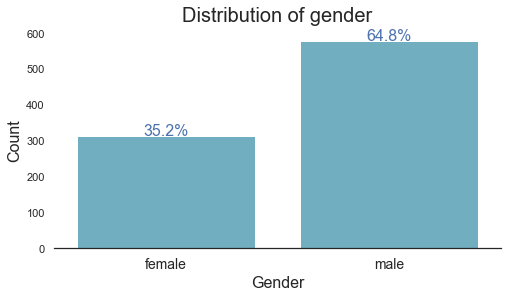

In [1260]:
plt.figure(figsize=(8,4))
sns.set_style('white')

base_color = sns.color_palette()[9]
sns.countplot(data = df, x = 'Sex', color = base_color)
sns.despine(left=True)

# add annotations
n_points = df.shape[0]
cat_counts = df['Sex'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'b', fontsize=16)
    
plt.title('Distribution of gender', fontsize=20, y=1.015)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Gender', fontsize=16)
plt.xticks(fontsize=14, rotation=360);

**Interpretation**: The ratio of males to females is almost 2:1

Variable: Age

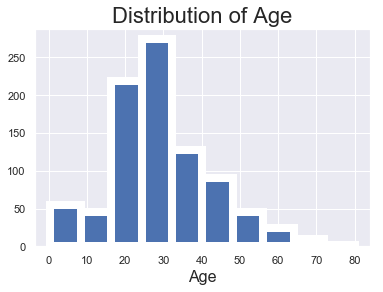

In [1261]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,4))
plt.hist(x=df['Age'], edgecolor='white', linewidth=8,color='b')
plt.title('Distribution of Age', fontsize=22)
plt.xlabel('Age', fontsize=16);

### Feature Engineering

**Define**

Identify passengers less than 16 years old

**Code**

In [1262]:
# creating a function to identify passengers less than 16 years old as that might play a role in survival rate

def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [1263]:
# creating a new column by applying male_female_child() 
df['person'] = df[['Age', 'Sex']].apply(male_female_child, axis=1)

**Test**

In [1264]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,male
5,6,0,3,"Moran, Mr. James",male,26.507589,0,0,330877,8.4583,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,child


In [1265]:
df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

**Define**

Create a column to show if a passenger traveled alone or was with family

**Code**

In [1266]:
df['If_alone'] = df['Parch'] + df['SibSp']

In [1267]:
df['If_alone'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: If_alone, dtype: int64

In [1268]:
# Recoding Alone column to have values "Alone" or "With family"

# Go to Alone column in df and locate all rows where Alone has value 0, then replace 0 with "Alone"

df['If_alone'].loc[df['If_alone']==0] = "Alone"

df['If_alone'] = df['If_alone'].replace(1,"With family")
df['If_alone'] = df['If_alone'].replace(2,"With family")
df['If_alone'] = df['If_alone'].replace(3,"With family")
df['If_alone'] = df['If_alone'].replace(4,"With family")
df['If_alone'] = df['If_alone'].replace(5,"With family")
df['If_alone'] = df['If_alone'].replace(6,"With family")
df['If_alone'] = df['If_alone'].replace(7,"With family")
df['If_alone'] = df['If_alone'].replace(10,"With family")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


**Test**

In [1269]:
df.sample(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,If_alone
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,S,female,Alone
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,S,male,Alone
747,748,1,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,S,female,Alone
400,401,1,3,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,7.9250,S,male,Alone
422,423,0,3,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,S,male,Alone
617,618,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,S,female,With family
352,353,0,3,"Elias, Mr. Tannous",male,15.0,1,1,2695,7.2292,C,child,With family


### Bivariate Exploration of data

Variables: Pclass and Person

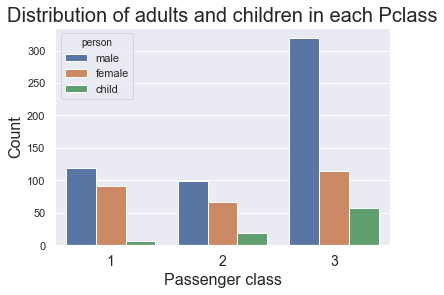

In [1270]:
sns.countplot(data=df, x='Pclass', hue='person')
plt.title('Distribution of adults and children in each Pclass', fontsize=20)
plt.xlabel('Passenger class', fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel('Count', fontsize=16);

Observation: As compared to Pclass 1 and 2, much more of the 3 class passengers were male than female. Another interesting point is that Pclass 3 had highest number of children as compared to Pclass 1 and 2. This is against my intuition that there will be more pampered children in Pclass 1 and 2 as they belong to rich parents who can afford higher fares for their children too.

Variables: Age and person

In [1271]:
df.groupby('person')['Age'].mean()

person
child      6.369518
female    30.473992
male      32.282661
Name: Age, dtype: float64

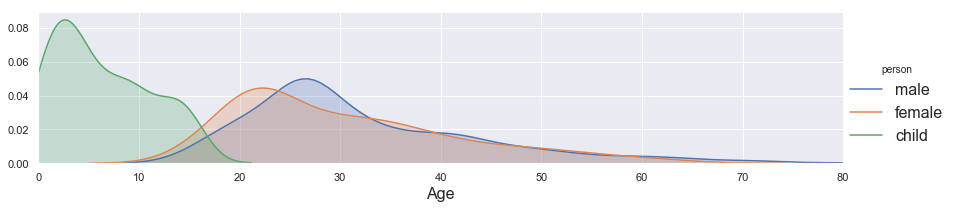

In [1272]:
fig = sns.FacetGrid(data=df, hue = 'person', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)

oldest = df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend(fontsize=16)
plt.xlabel('Age',fontsize=16);

**Interpretation**: The average age of female adult passengers and adult male passengers is around 30 years and 32 years respectively while that of child is 6 years.

Variables: Age and Pclass

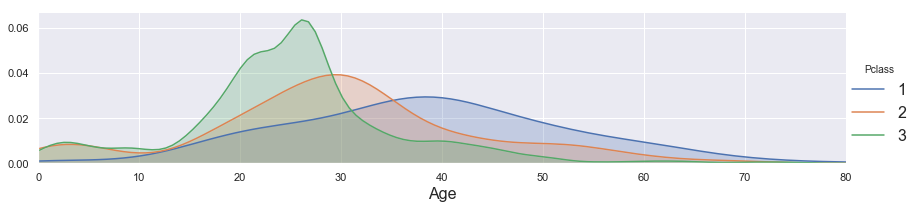

In [1273]:
fig = sns.FacetGrid(data=df, hue='Pclass', aspect =4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend(fontsize=16)
plt.xlabel('Age',fontsize=16);

**Interpretation**: Pclass 1 has a nromal distribution. Pclass 2 and 3 are skewed to the right. The average age of passengers is around 30 years.

### Question: Where did our passsengers board from?

Variable: Embarked and Pclass

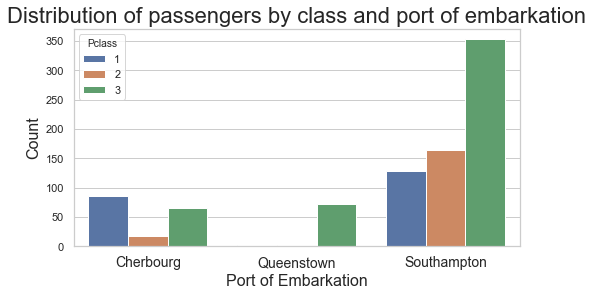

In [1274]:
level_order = ['C', 'Q', 'S']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df['Embarked'] = df['Embarked'].astype(ordered_cat)


plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
plt.title("Frequency count of each port of embarkation")
g = sns.countplot(x='Embarked',data=df,hue='Pclass', order = level_order)
g.set_xticklabels(["Cherbourg","Queenstown", "Southampton"], fontsize=14)
plt.title('Distribution of passengers by class and port of embarkation', fontsize=22)
plt.xlabel('Port of Embarkation', fontsize=16)
plt.ylabel("Count", fontsize=16);

**Interpretation**: Passengers in Pclass 1 and Pclass 2 came from either Cherbourg or Southampton; highest number of passengers in Pclass 3 boarded from Southampton.

Passengers that boarded from Queenstown were majorly from Pclass 3. So maybe Queenstown had population that were from the lower income group. 
Southampton had population from all the income groups. 

### Question: How many passengers were traveling alone and how many were traveling with family?

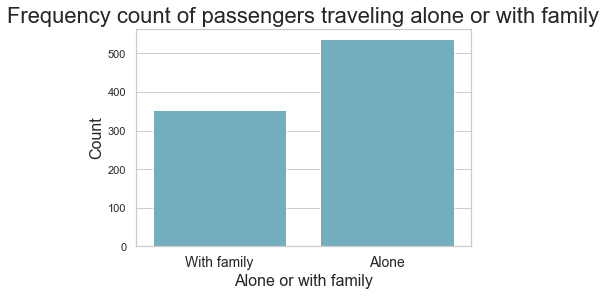

In [1275]:
base_color = sns.color_palette()[9]
sns.set_style('whitegrid')
plt.title("Frequency count of passengers traveling alone or with family", fontsize=22)
sns.countplot(x='If_alone',data=df, color=base_color )

plt.xlabel('Alone or with family', fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=14);

**Interpretation**:More number of passengers traveled alone

### Question : What was the average fare for each class at each port of embarkation?

In [1276]:
df.groupby(['Embarked', 'Pclass'])['Fare'].mean().unstack()

Pclass,1,2,3
Embarked,,,
C,104.718529,25.358335,11.214083
Q,90.000000,12.350000,11.183393
S,70.514244,20.327439,14.644083


Ticket fare for Pclass 1 and 2 was most expensive at Cherbough. We saw earlier that majority of passengers that boarded from Southampton were from Pclass 3. Here we can note that the ticket fare for Pclass 3 was most expensive from Southampton. 

### Question : What factors helped someone survive the sinking?

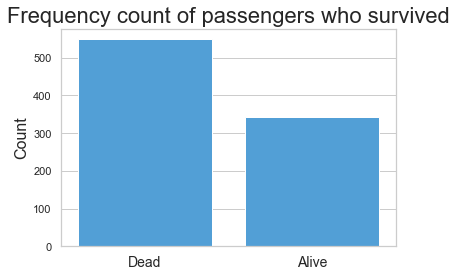

In [1277]:
base_color = sns.husl_palette()[4]
sns.set_style('whitegrid')

x=['Dead', 'Alive']
plt.title("Frequency count of passengers who survived", fontsize=22)
ax = sns.countplot(x='Survived',data=df, color=base_color)
plt.xlabel("", color = 'white')
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=14)
ax.set_xticklabels(x);

A large majority of passengers on Titanic died. But as the saying goes, "Women and children first", we can hypothesize that 
the survival rate of women and children would be more than men. Further, if the passenger is a female or child from Pclass 1 or 2, then the survival rate increases even more. So the survival chances of men are less. We can show that with the below chart.

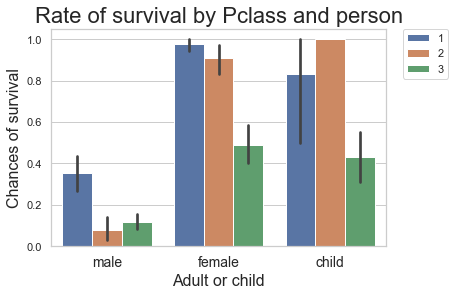

In [1278]:
plt.figure(figsize=(6,4))
sns.barplot(x="person", y = "Survived", hue="Pclass", data = df)
plt.title('Rate of survival by Pclass and person', fontsize=22)
plt.xlabel('Adult or child', fontsize=16)
plt.ylabel('Chances of survival', fontsize=16)
plt.xticks(fontsize=14)

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

**Interpretation**: Females and children in Pclass 1 and Pclass 2 have the highest survival rate.

In [1279]:
pd.crosstab([df['person'], df['Pclass']], df['Survived'], margins = True)

Survived         0    1  All
person Pclass               
child  1         1    5    6
       2         0   19   19
       3        33   25   58
female 1         2   89   91
       2         6   60   66
       3        58   56  114
male   1        77   42  119
       2        91    8   99
       3       281   38  319
All            549  342  891

**Another point to look into can be that a passenger traveling alone has less chances of survival than a passenger traveling
with family**

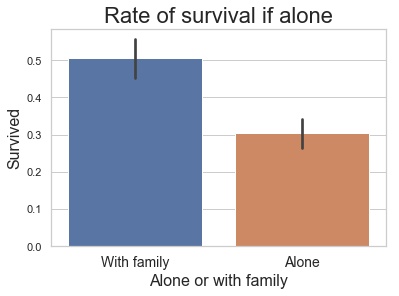

In [1280]:
sns.barplot(x='If_alone', data =df, y='Survived')
plt.title('Rate of survival if alone', fontsize=22)
plt.xlabel('Alone or with family', fontsize=16)
plt.ylabel('Survived', fontsize=16)
plt.xticks(fontsize=14);

<a id='Logistic Regression Model'></a>
## Logistic Regression Model

### Getting the data ready for building logistic regression model

In [1281]:
# removing columns that are not useful for model
df = df.drop(['PassengerId','Name','SibSp', 'Parch','Ticket'], axis=1)

In [1282]:
df.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,person,If_alone
649,1,3,female,23.000000,7.5500,S,female,Alone
151,1,1,female,22.000000,66.6000,S,female,With family
293,0,3,female,24.000000,8.8500,S,female,Alone
536,0,1,male,45.000000,26.5500,S,male,Alone
31,1,1,female,34.611765,146.5208,C,female,With family


In [1283]:
# checking if the datatypes are correct and there are no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null category
Age         891 non-null float64
Fare        891 non-null float64
Embarked    891 non-null category
person      891 non-null object
If_alone    891 non-null object
dtypes: category(2), float64(2), int64(2), object(2)
memory usage: 43.8+ KB


`PClass` should be transformed <br>
`Sex` should be mapped for binary classification<br>
`Embarked` should be transformed <br>
`person` should be transformed<br>
`If_alone` should be mapped for binary classification

In [1284]:
pclass = pd.get_dummies(df['Pclass'], drop_first = True)
sex = pd.get_dummies(df['Sex'], drop_first = True)
embarked = pd.get_dummies(df['Embarked'], prefix = 'Embarked', drop_first = True)
adult_or_child = pd.get_dummies(df['person'], prefix='person_is', drop_first = True)
df['If_alone'] = df['If_alone'].map({'With family':1, 'Alone':0})

In [1285]:
# adding the newly created variables to df
df = pd.concat([df,pclass, sex,embarked,adult_or_child], axis=1)

In [1286]:
# removing Pclass, Sex, Embarked, person

df.drop(['Pclass', 'Sex','Embarked', 'person'], axis=1, inplace=True)

In [1287]:
df.sample(3)

# male is coded as 1, female as 0

,Survived,Age,Fare,If_alone,2,3,male,Embarked_Q,Embarked_S,person_is_female,person_is_male
492,0,55.0,30.5,0,0,0,1,0,1,0,1
616,0,34.0,14.4,1,0,1,1,0,1,0,1
861,0,21.0,11.5,1,1,0,1,0,1,0,1


*Now our dataset is ready for model building*

**X will contain all the features except 'Survived' which is our dependent variable**

In [1288]:
X = df.drop('Survived', axis=1)
y = df['Survived']

**Now we will split the data in train and test using scikit learn**

In [1289]:
from sklearn.model_selection import train_test_split

In [1290]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, 
                                                    random_state=101)

So we have split the dataset into 30% for test and 70% for train. random_state ensures that results can be replicated.

**Now next step is to train and predict by creating a model.**

In [1291]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [1292]:
# we create an instance of a logistic regression model

In [1293]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [1294]:
# Checking the accuracy of the model

In [1295]:
predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       154
           1       0.79      0.65      0.71       114

   micro avg       0.78      0.78      0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



In [1296]:
# We got 78% accuracy

In [1297]:
# Let's see the confusion matrix

In [1298]:
confusion_matrix(y_test, predictions)

array([[134,  20],
       [ 40,  74]], dtype=int64)

In [1299]:
# True Positive: We predicted survival and actually the passenger survived : 134
# True Negative: We predicted death and actually the passenger died : 74
# False Positive: We predicted survival but the passenger died : 20
# False Negative: We predicted death but passenger survived : 40

In [1300]:
rfe = RFE(logmodel, 20)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [1301]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.459643
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.310     
Dependent Variable: Survived         AIC:              839.0844  
Date:               2019-08-06 15:07 BIC:              887.0078  
No. Observations:   891              Log-Likelihood:   -409.54   
Df Model:           9                LL-Null:          -593.33   
Df Residuals:       881              LLR p-value:      1.1240e-73
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Age               -0.0030   0.0084 -0.3612 0.7179 -0.0195  0.0134
Fare               0.0059   0.0024  2.4075 0.0161  0.0011  0.0107


Some of the variables are insignificant. So we will run another iteration by excluding those variables

In [1302]:
cols= [3, 'male', 'person_is_female', 'person_is_male']

In [1303]:
X=df[cols]

In [1304]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.467606
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.298     
Dependent Variable: Survived         AIC:              841.2733  
Date:               2019-08-06 15:07 BIC:              860.4427  
No. Observations:   891              Log-Likelihood:   -416.64   
Df Model:           3                LL-Null:          -593.33   
Df Residuals:       887              LLR p-value:      2.7631e-76
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
3                 -1.2802   0.1700 -7.5311 0.0000 -1.6133 -0.9470
male               1.0190   0.3529  2.8875 0.0039  0.3273  1.7107


In [1305]:
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [1306]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


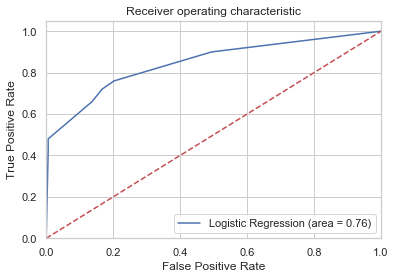

In [1307]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)